# Classification problem Part1

Investigate classification problems and learn how to solve them using supervised learning techniques. Example of a political dataset: classify the party affiliation of United States congressmen based on their voting records. 

Then this classifier can be used to predict the party affiliation ('Democrat' or 'Republican') based on their voted on certain key issues.   

From my work on [Datacamp](https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn)

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt


## Data

The main dataset is obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and consists of votes made by US House of Representatives Congressmen. The goal is to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. 

The dataset has been dowloaded locally at _path_datafile_

In [2]:
# Identify path of the repository
path=os.getcwd().split('ds_portfolio')[0]
path

'/Users/locupe/Dropbox/Perso/Dataproject/'

In [3]:
path_datafile = path + 'ds_portfolio/data/raw/house-votes-84.data'

In [4]:
# Define header name for csv importation
header_list = ["party", "infants", "water", "budget",
               "physician", "salvador", "religious", 
               "satellite", "aid", "missile", "immigration", 
               "synfuels", "education", "superfund", "crime", 
               "duty_free_exports", "eaa_rsa" 
              ]

# Import csv
df0 = pd.read_csv(path_datafile, names=header_list)
df0.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Preprocessing

#### Dropping missing data

In [5]:
df = df0
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print(f"Shape of Original DataFrame: {df.shape}")

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print(f"Shape of DataFrame After Dropping all the missing values: {df.shape}")

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping all the missing values: (232, 17)


## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              232 non-null    object
 1   infants            232 non-null    object
 2   water              232 non-null    object
 3   budget             232 non-null    object
 4   physician          232 non-null    object
 5   salvador           232 non-null    object
 6   religious          232 non-null    object
 7   satellite          232 non-null    object
 8   aid                232 non-null    object
 9   missile            232 non-null    object
 10  immigration        232 non-null    object
 11  synfuels           232 non-null    object
 12  education          232 non-null    object
 13  superfund          232 non-null    object
 14  crime              232 non-null    object
 15  duty_free_exports  232 non-null    object
 16  eaa_rsa            232 non-null    object
dt

In [7]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


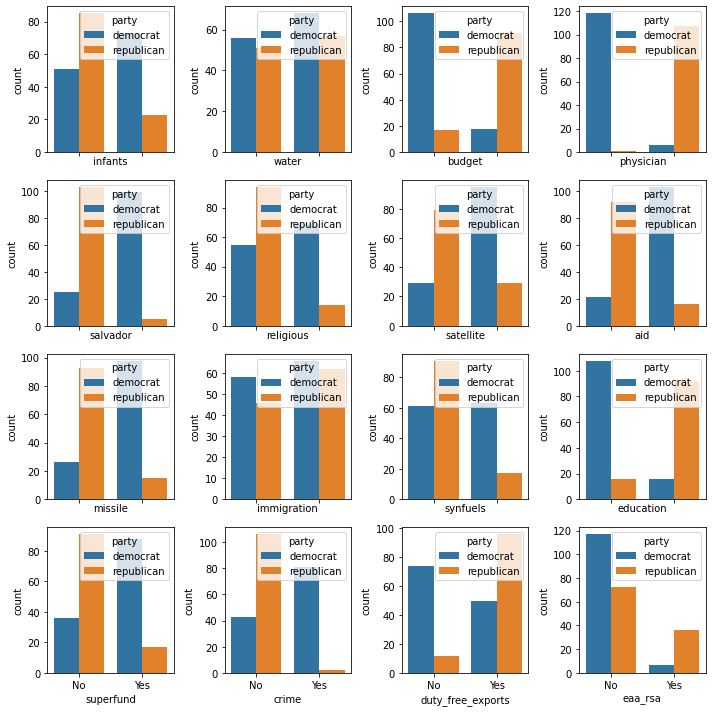

In [8]:
fig, axes =plt.subplots(4,4, figsize=(10,10), sharex=True)
axes = axes.flatten()
for ax, catplot in zip(axes, df.iloc[:, 1:]):
    sns.countplot(x=catplot, data=df, hue=df['party'], ax=ax)
    plt.xticks([0,1], ['No', 'Yes'])
plt.tight_layout()  
plt.show()


## Modelisation

### K-Nearest Neighbors

<img style="float: right; max-width: 40%;" src="https://miro.medium.com/max/700/1*T8Pnw0kiVbrPGnqnB2I_Zw.jpeg">

*k-nearest neighbors* is chosen as a starting algorithm. k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points
The main advantages are:
* Very simple implementation.
* Robust with regard to the search space; for instance, classes don't have to be linearly separable.
* Few parameters to tune: distance metric and k.

*Information on K nearest neighbors stats can be found [[here]](https://stats.libretexts.org/Bookshelves/Computing_and_Modeling/RTG%3A_Classification_Methods/3%3A_K-Nearest_Neighbors_(KNN))*

<p style='text-align: right;'> Image credit from <a href="https://www.datacamp.com">Datacamp</a>  </p>

In [9]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [41]:
# Need to replace string by number
df=df.replace(to_replace=['n', 'y'], value=[0, 1])

##### Create arrays for the features and the response variable

In [11]:
y = df['party'].values
X = df.drop('party', axis=1).values

##### Split into training and test set


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
# The stratify parameter asks whether you want to retain the same proportion of classes 
# in the train and test sets that are found in the entire original dataset. 

##### Create the classifier and fit to the training data

In [13]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

##### Print the accuracy

In [14]:
print(knn.score(X_test, y_test))


0.9142857142857143


##### Note to myself - *how to predict a new data point?*

In [15]:
(mm,nn) = X.shape
# Generation of a random unlabel data point
X_new = np.random.choice([0, 1], size=(1,nn)) #, p=[1./3, 2./3])

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction =  knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['republican']


### Assess model performance

**Accuracy** is a metric for evaluating classification models. It is calculated by dividing the number of correct predictions by the number of total predictions.

Accuracy is not a good performance metric when there is imbalance in the dataset. For example, in binary classification with 95% of A class and 5% of B class, prediction accuracy can be 95%. In case of imbalance dataset, we need to choose Precision, recall, or F1 Score depending on the problem we are trying to solve.


#### Confusion Matrix


**Confusion matrix** shows how many True positives (TP), True Negative (TN), False Positive (FP) and False Negative (FN) model has made.

||                |     Actual   |        Actual |
|:---:|   :---:        |     :---:    |:---:          |
||                | Positive (1) | Negative (0)  |
|Predicted|   Positive (1) | TP           | FP            |
|Predicted|   Negative (0) | FN           | TN            |

* True Positives (TP): When the actual class of the observation is 1 (True) and the prediction is 1 (True)
* True Negative (TN): When the actual class of the observation is 0 (False) and the prediction is 0 (False)
* False Positive (FP): When the actual class of the observation is 0 (False) and the prediction is 1 (True)
* False Negative (FN): When the actual class of the observation is 1 (True) and the prediction is 0 (False)

Most of the performance metrics for classification models are based on the values of the confusion matrix.


In [36]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))



[[35  1]
 [ 2 32]]


\
Other classification metrics: *Precision, recall, and F1-score*
* Precision and recall are classification evaluation metrics:
* **Precision P** = TP / (TP + FP) 
* **Recall R** = TP / (TP + FN).
* Where TP is true positives, FP is false positives and FN is false negatives
* In both cases the score of 1 is the best: we get no false positives or false negatives and only true positives.
* F1 is a combination of both precision and recall in one score (harmonic mean):
* F1 = 2 * PR / (P + R).
* Max F score is 1 and min is 0, with 1 being the best.

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    democrat       0.95      0.97      0.96        36
  republican       0.97      0.94      0.96        34

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70



**Receiver operating characteristic (ROC) curve**

ROC stands for *Receiver Operating Characteristics*. The diagrammatic representation that shows the contrast between true positive rate vs true negative rate. It is used when we need to predict the probability of the binary outcome.


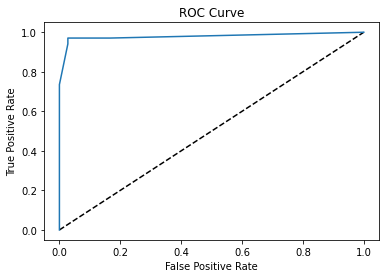

In [17]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label='republican')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


---
**AUC**:
AUC stands for *Area Under the ROC Curve*. ROC is a probability curve and AUC represents degree or measure of separability. It's used when we need to value how much model is capable of distinguishing between classes.  The value is between 0 and 1, the higher the better.

In [37]:
# Import necessary modules
from sklearn.metrics import roc_auc_score 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print(f"AUC: {roc_auc_score(y_test, y_pred_prob)}")

AUC: 0.9791666666666667


An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. When AUC score is 0.5, it means model has no class separation capacity whatsoever. 


\
**Note**: If the dataset is imbalanced and/or true negatives are important for the problem investigated, the Precision/Recall curve will be more useful than the ROC curve. 

see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html


### Model complexity

Larger _k_ = smoother decision boundary = less complex \
Smaller _k_ = more complex model = can led to overfit

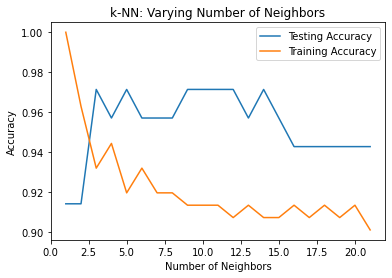

In [26]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 22)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### K-Cross validation for more accurate performance


<img style="float: right; max-width: 40%;" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

Advantages: 
* Computation time is reduced as we repeated the process only 10 times when the value of k is 10.
* Reduced bias
* Every data points get to be tested exactly once and is used in training k-1 times


In [40]:
# Import necessary modules
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')

# Print list of AUC scores
print(f"AUC scores computed using 10-fold cross-validation: {cv_auc}")
print(f"Average 10-fold CV Score: {np.mean(cv_auc)}")

AUC scores computed using 10-fold cross-validation: [1.         0.88111888 0.99230769 0.91153846 1.         0.95454545
 1.         1.         0.86363636 0.95075758]
Average 10-fold CV Score: 0.955390442890443


### Selecting the "best" model

-> a trade-off between bias and variance. 

A simple model will generately underfit the data while a complex will overfit the data. 

Underfitting means that a model doesn't score well in modeling the training data or new data.

Overfitting occurs when a model represent very well the training data but cannot model correclty any other.

To limit overfitting it is important to use resampling technique (e.g. *k-fold cross validation*), which allows to tran and test the model *k-times* on different subsets of training data.


### Validation curve

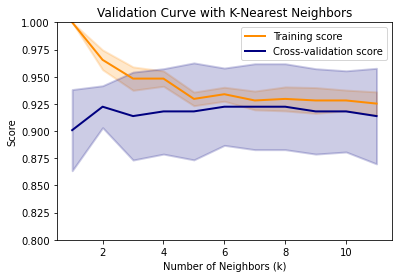

In [32]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 12)
train_scores, test_scores = validation_curve( KNeighborsClassifier(), X, y,
                                          param_name="n_neighbors",
                                          param_range=param_range, 
                                          scoring="accuracy",
                                          cv=4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with K-Nearest Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

**Note**: For KNN models, complexity is determined by the value of K (lower value = more complex). On this graph we can see that for k<6 the training score increase and diverge from the test score -> sign of higher variance

## Notes on the models used
#### K-NN

**Advantages**

* The algorithm is simple and easy to implement.
* There’s no need to build a model, tune several parameters, or make additional assumptions.
* The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).

<br/>

**Disadvantages**

The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

<br/>



**ANALYSIS CONTINUE in part2 notebook**